In [1]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from sklearn.metrics import mean_absolute_error


# Import train/pretest dataset

In [2]:
train_df = pd.read_csv('data/train.csv')[:60000]
pretest_df = pd.read_csv('data/pretest.csv')

# Check for feature in the dataset

In [3]:
feature = list(train_df.columns.values)
feature = {k: v for k, v in enumerate(feature)}
feature

{0: 'MOFname',
 1: 'volume [A^3]',
 2: 'weight [u]',
 3: 'surface_area [m^2/g]',
 4: 'void_fraction',
 5: 'void_volume [cm^3/g]',
 6: 'functional_groups',
 7: 'metal_linker',
 8: 'organic_linker1',
 9: 'organic_linker2',
 10: 'topology',
 11: 'CO2/N2_selectivity',
 12: 'heat_adsorption_CO2_P0.15bar_T298K [kcal/mol]',
 13: 'CO2_working_capacity [mL/g]'}

# Data cleaning

In [4]:
train = train_df.iloc[:, [1,2,3,4,5,7,8,9,11,12,13]]
train.head()

,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],metal_linker,organic_linker1,organic_linker2,CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],CO2_working_capacity [mL/g]
0,1116.667429,875.240600,0.00,0.07899,0.0607,3,4,11,22.864166,6.786041,105.284502
1,2769.503842,2211.697211,603.61,0.13794,0.1040,10,44,57,33.616780,7.147286,101.224774
2,1089.818728,773.687960,788.50,0.14874,0.1262,2,22,24,19.263726,6.347967,118.987011
3,2205.198301,1304.638720,1441.53,0.21814,0.2220,9,17,24,25.701377,6.190085,187.626004
4,1137.800963,901.736120,0.00,0.07778,0.0591,2,1,22,30.001838,6.478063,79.210001


In [5]:
check_null = train.isnull().any(axis=0)
check_inf = np.isinf(train).any(axis=0)

print(check_null)
print(check_inf)

volume [A^3]                                     False
weight [u]                                       False
surface_area [m^2/g]                             False
void_fraction                                    False
void_volume [cm^3/g]                             False
metal_linker                                     False
organic_linker1                                  False
organic_linker2                                  False
CO2/N2_selectivity                               False
heat_adsorption_CO2_P0.15bar_T298K [kcal/mol]    False
CO2_working_capacity [mL/g]                      False
dtype: bool
volume [A^3]                                     False
weight [u]                                       False
surface_area [m^2/g]                             False
void_fraction                                    False
void_volume [cm^3/g]                             False
metal_linker                                     False
organic_linker1                                  Fals

In [6]:
ratio = 0.8
train_size = math.floor(train.shape[0]*0.8)
test_size = train.shape[0] - train_size
print("Dataset size:", train.shape[0])
print("Train size:", train_size)
print("Test size:", test_size)

Dataset size: 60000
Train size: 48000
Test size: 12000


In [7]:
x_train = train.iloc[0:train_size, :-1].astype(np.float32)
y_train = train.iloc[0:train_size, -1].astype(np.float32)
x_test = train.iloc[train_size:train_size+test_size, :-1].astype(np.float32)
y_test = train.iloc[train_size:train_size+test_size, -1].astype(np.float32)

# Create model

In [8]:
def model_swish():
  model = tf.keras.models.Sequential()

  model.add(tf.keras.layers.Dense(12, input_dim=(10), activation='swish'))
  model.add(tf.keras.layers.Dense(24, activation='swish'))
  model.add(tf.keras.layers.Dense(12, activation='swish'))
  model.add(tf.keras.layers.Dense(1, activation='linear'))

  model.compile(loss=tf.keras.losses.MeanAbsoluteError(), optimizer=tf.keras.optimizers.Adam())
  return model

def model_relu():
  model = tf.keras.models.Sequential()

  model.add(tf.keras.layers.Dense(12, input_dim=(10), activation='relu'))
  model.add(tf.keras.layers.Dense(24, activation='relu'))
  model.add(tf.keras.layers.Dense(12, activation='relu'))
  model.add(tf.keras.layers.Dense(1, activation='linear'))

  model.compile(loss=tf.keras.losses.MeanAbsoluteError(), optimizer=tf.keras.optimizers.Adam())
  return model

In [9]:
swish = model_swish()
relu = model_relu()

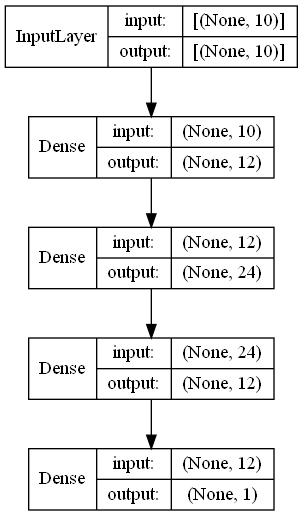

In [10]:
tf.keras.utils.plot_model(swish, to_file='model_pic/model.png', show_shapes=True, show_layer_names=False)

# Fit the model

In [11]:
sw_history = swish.fit(x_train, y_train, epochs=150, verbose=0)
re_history = relu.fit(x_train, y_train, epochs=150, verbose=0)

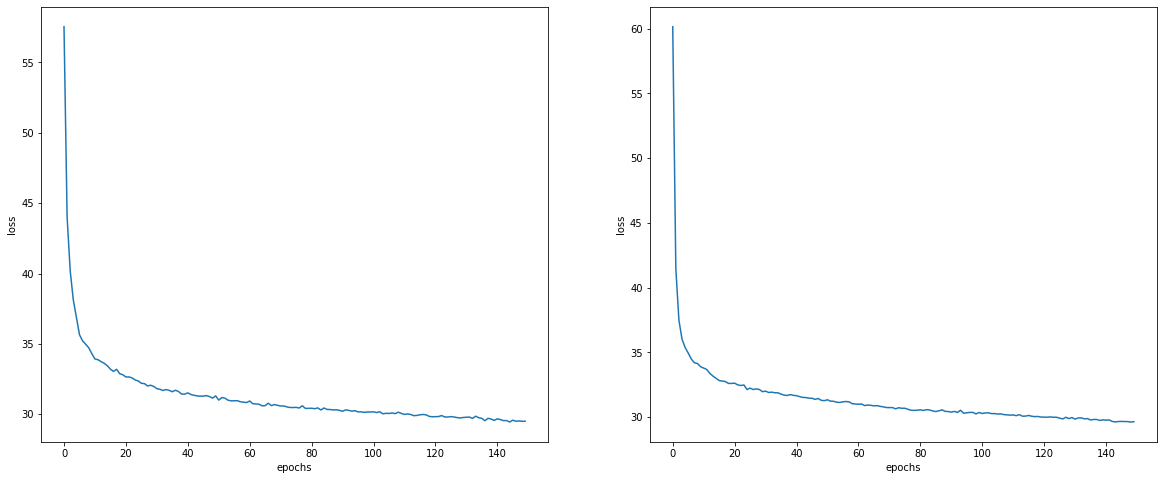

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))

sw_loss = sw_history.history['loss']
re_loss = re_history.history['loss']

ax1.plot(sw_loss)
ax2.plot(re_loss)
ax1.set_xlabel('epochs'), ax2.set_xlabel('epochs')
ax1.set_ylabel('loss'), ax2.set_ylabel('loss')

plt.show()

In [13]:
sw_pred = swish.predict(x_test)
re_pred = relu.predict(x_test)

In [14]:
sw_log_mae = np.log(mean_absolute_error(sw_pred, y_test))
re_log_mae = np.log(mean_absolute_error(re_pred, y_test))

print('Swish activation : ' + str(sw_log_mae))
print('ReLU activation : ' + str(re_log_mae))

Swish activation : 3.387215
ReLU activation : 3.4611566
